<a href="https://colab.research.google.com/github/tashir0605/SentimentSphere/blob/main/emotion_through_speech/Emotion_Recognition_Through_Speech_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [14]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle

Saving kaggle.json to kaggle.json


In [15]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                     Student Depression Dataset                           467020  2025-03-13 03:12:30.423000          15094        237  1.0              
zahidmughal2343/amazon-sales-2025                          Amazon Sales 2025                                      3617  2025-04-03 22:08:13.607000           2471         37  1.0              
atharvasoundankar/chocolate-sales                          Chocolate Sales Data 📊🍫                               14473  2025-03-19 03:51:40.270000          23070        369  1.0              
adilshamim8/math-students               

In [16]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)


In [17]:
!unzip -q toronto-emotional-speech-set-tess.zip -d tess_data

In [18]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess_data'):
    for filename in filenames:
        if filename.endswith('.wav'):
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1].split('.')[0]
            labels.append(label.lower())
    if len(paths) >= 2800:  # Optional limit
        break

print('Dataset is Loaded')

Dataset is Loaded


In [19]:
len(paths)

2800

In [20]:
paths[:5]

['/content/tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_numb_fear.wav',
 '/content/tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_hurl_fear.wav',
 '/content/tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_wash_fear.wav',
 '/content/tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_search_fear.wav',
 '/content/tess_data/TESS Toronto emotional speech set data/OAF_Fear/OAF_burn_fear.wav']

In [21]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

# Creating a dataframe of the audio files and labels

In [22]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess_data/TESS Toronto emotional spee...,fear
1,/content/tess_data/TESS Toronto emotional spee...,fear
2,/content/tess_data/TESS Toronto emotional spee...,fear
3,/content/tess_data/TESS Toronto emotional spee...,fear
4,/content/tess_data/TESS Toronto emotional spee...,fear


In [23]:
df['label'].value_counts()

,count
label,
fear,400
sad,400
neutral,400
angry,400
disgust,400
happy,400
ps,400


# Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

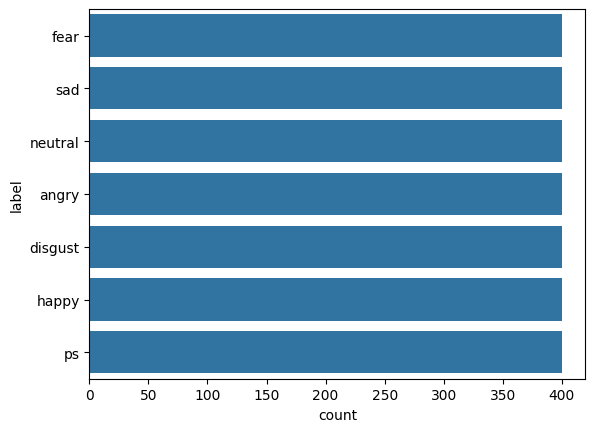

In [24]:
sns.countplot(df['label'])

In [25]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

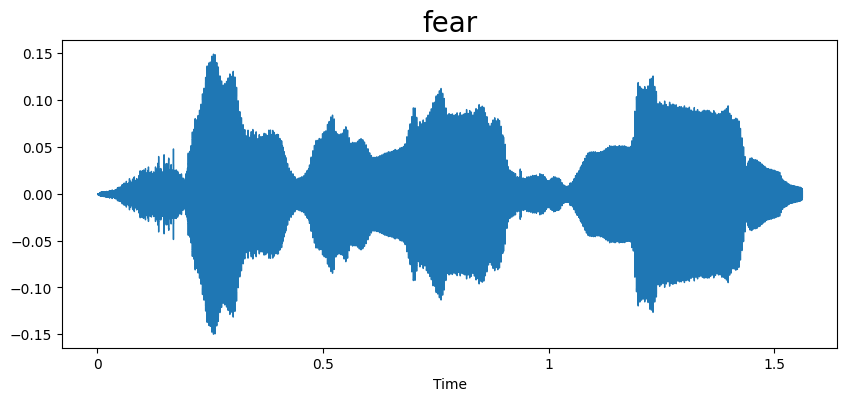

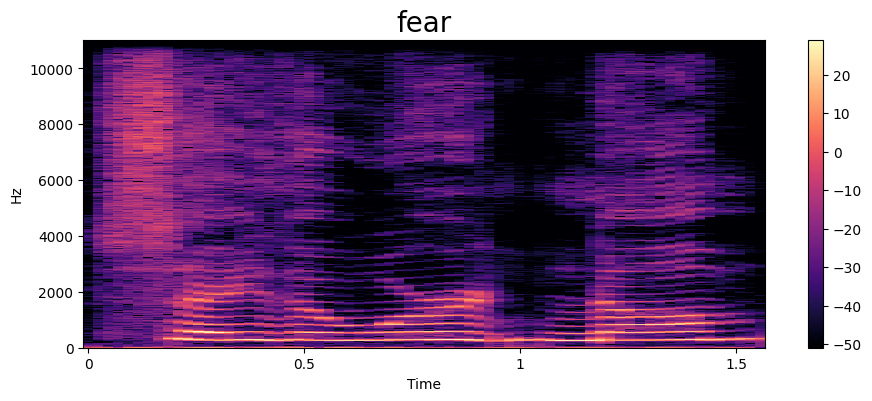

In [26]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

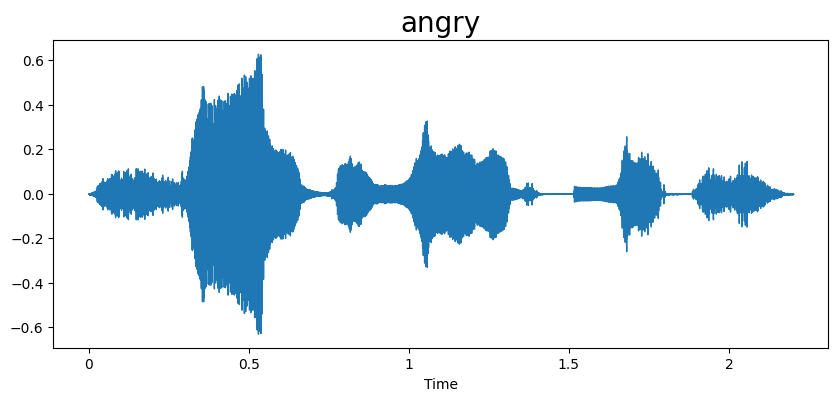

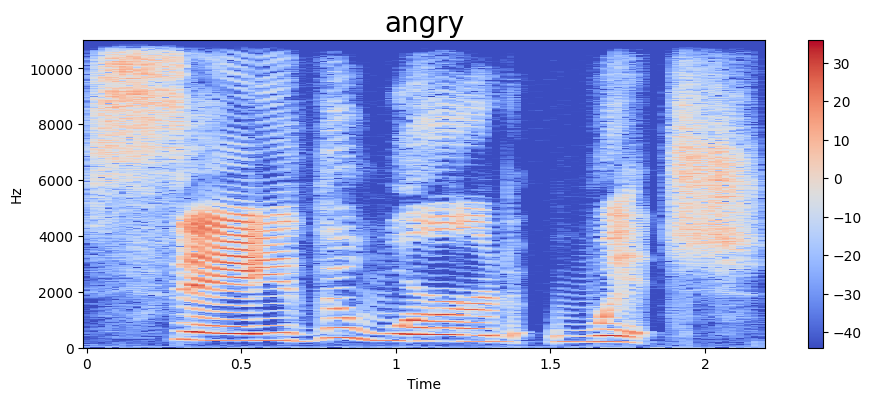

In [27]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

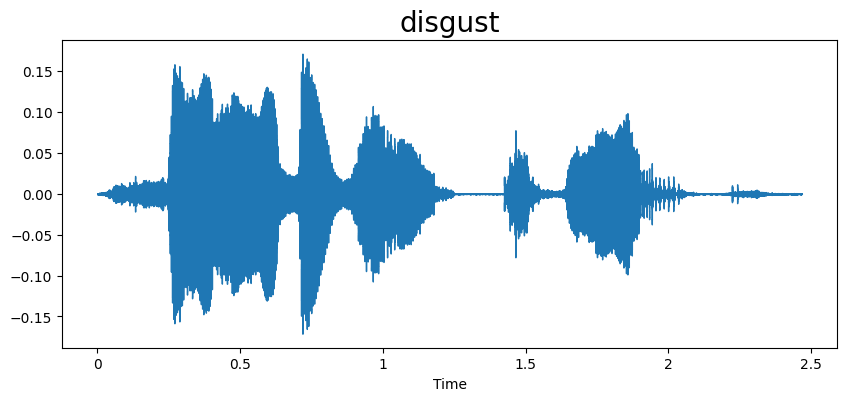

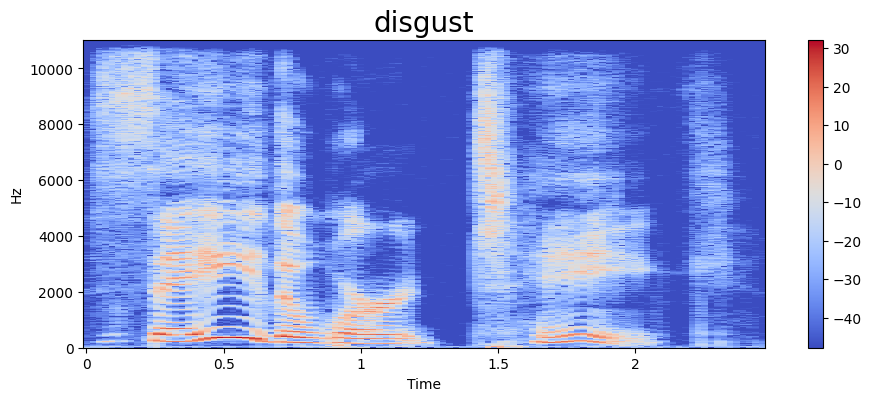

In [28]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

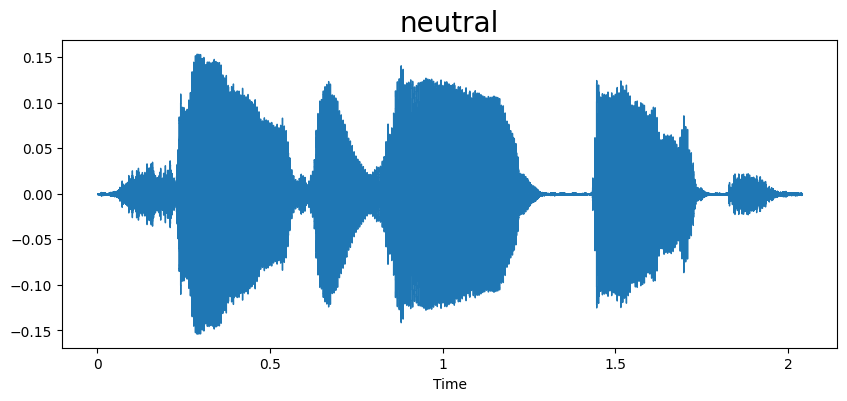

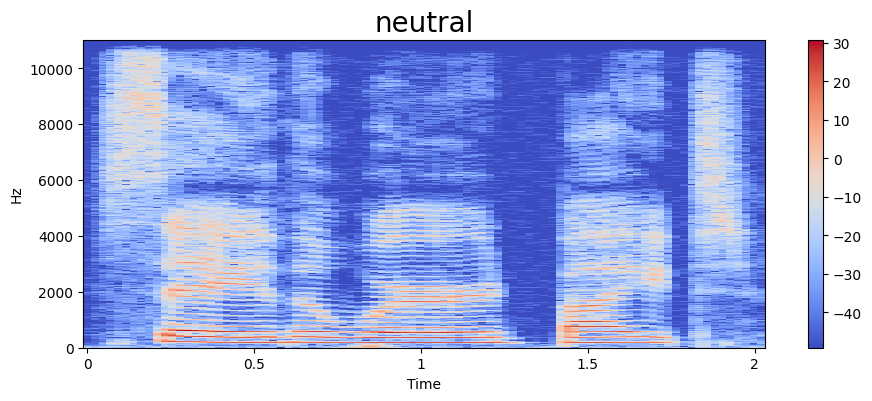

In [29]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

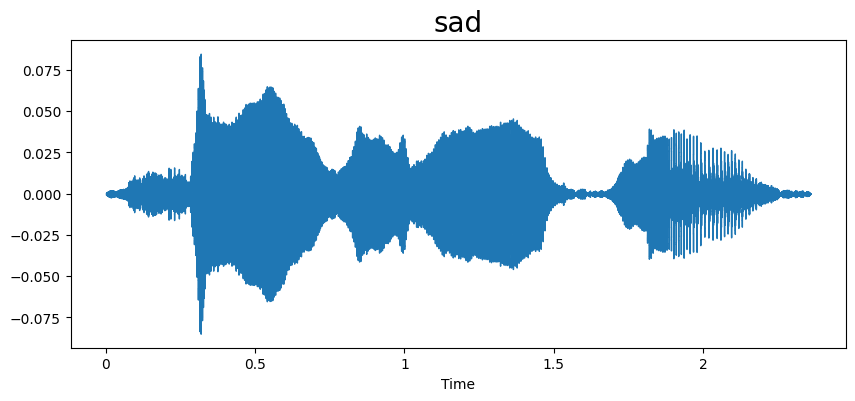

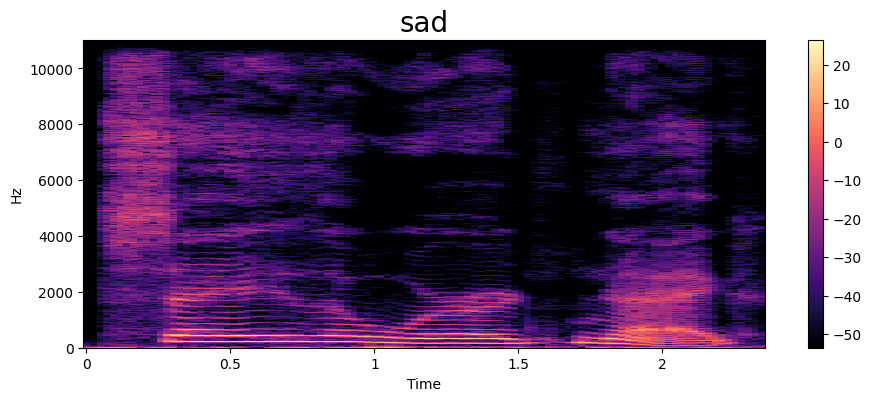

In [30]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

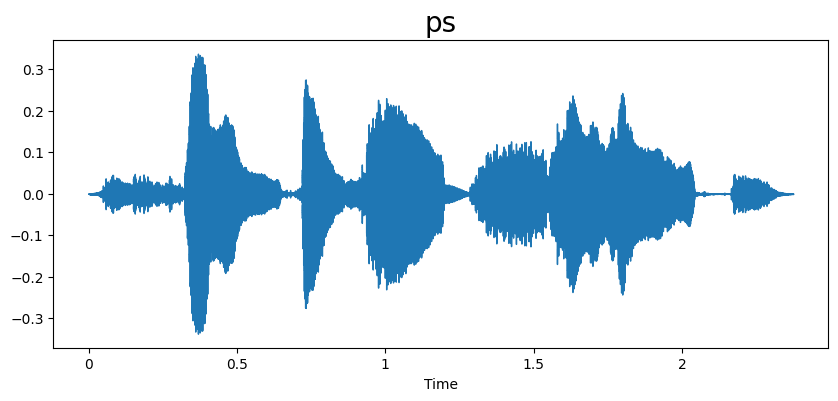

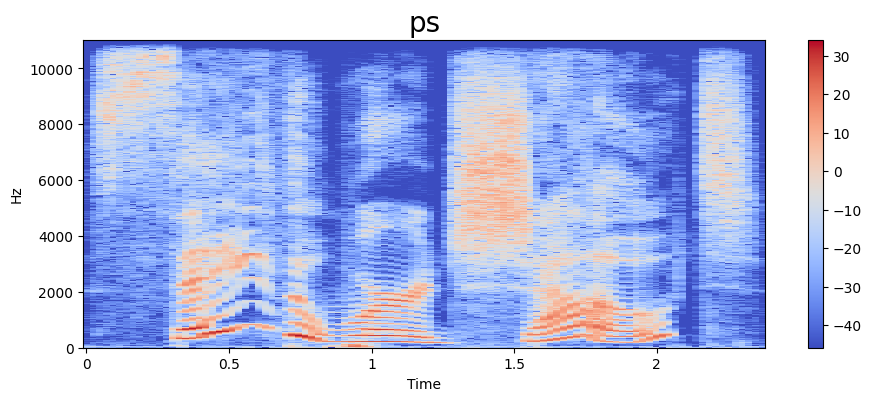

In [31]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

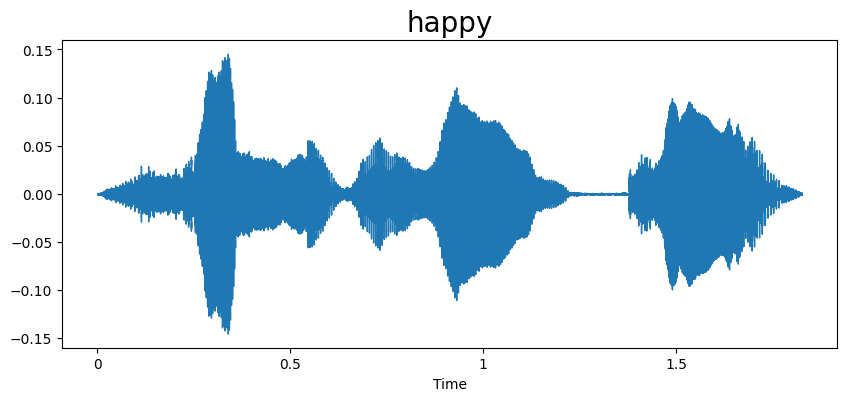

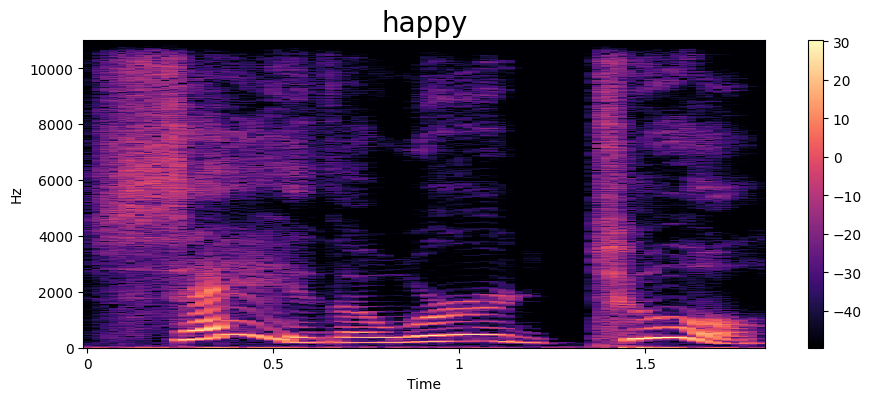

In [32]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


# Feature Extraction

In [33]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [34]:
extract_mfcc(df['speech'][0])

array([-4.52298523e+02,  1.04515770e+02,  2.15791378e+01, -1.68680897e+01,
       -1.16014700e+01,  5.81865215e+00, -6.12392330e+00,  5.37421465e+00,
       -2.02916374e+01, -1.08721695e+01, -1.01454887e+01, -2.00237751e+01,
       -1.13311806e+01,  1.62559664e+00, -1.39139957e+01, -1.10954583e-01,
       -6.58737516e+00, -3.89505911e+00,  2.50123596e+00, -9.52067757e+00,
       -8.39204884e+00,  6.74459791e+00,  7.52038765e+00,  2.83044071e+01,
        3.55767174e+01,  3.74502907e+01,  2.44150791e+01,  2.23745575e+01,
       -6.45070601e+00,  5.64135373e-01,  2.16295671e+00,  3.92467046e+00,
        4.03718853e+00, -4.22295427e+00, -6.37083435e+00,  9.10223067e-01,
        6.19518220e-01,  3.84898305e+00, -9.00145626e+00, -9.16408956e-01],
      dtype=float32)

In [35]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

,speech
0,"[-452.29852, 104.51577, 21.579138, -16.86809, ..."
1,"[-426.82065, 101.89979, 19.433798, -45.09878, ..."
2,"[-407.78436, 72.88476, 4.5898614, -18.298637, ..."
3,"[-453.2965, 42.2619, 7.3159423, -6.5037084, 3...."
4,"[-483.49344, 111.59739, 23.837387, -36.05289, ..."
...,...
2795,"[-426.1236, 119.0085, 19.403599, -18.24059, -2..."
2796,"[-417.84155, 85.96727, -7.114976, -6.639556, 1..."
2797,"[-435.60114, 111.09735, 18.580637, 0.8667717, ..."
2798,"[-492.2931, 101.73317, -9.468237, -5.1115594, ..."


In [37]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [38]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [40]:
y = y.toarray()

In [41]:
y.shape

(2800, 7)

# Create a LSTM Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [43]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.4143 - loss: 1.4778 - val_accuracy: 0.0071 - val_loss: 5.5800
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8652 - loss: 0.3906 - val_accuracy: 0.0054 - val_loss: 7.1360
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9318 - loss: 0.2364 - val_accuracy: 0.0857 - val_loss: 6.8193
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9600 - loss: 0.1186 - val_accuracy: 0.2357 - val_loss: 6.7197
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.9696 - loss: 0.0935 - val_accuracy: 0.2429 - val_loss: 6.9543
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.9718 - loss: 0.0826 - val_accuracy: 0.1982 - val_loss: 6.7983
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.9749 - loss: 0.0818 - val_accuracy: 0.2500 - val_loss: 7.3531
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9817 - loss: 0.0513 - val_accura

# Plot the results

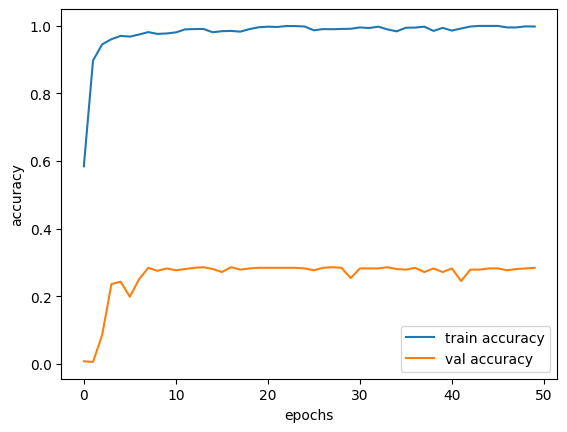

In [44]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

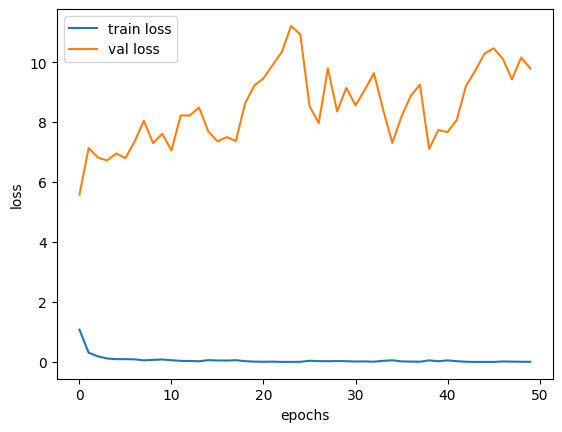

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()